In [2]:
!pip install -r requirements.txt

In [3]:
import pandas as pd
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

In [4]:
for item in train.columns:
    print(item)
    print(train[item].unique())

customerID
['3798-EPWRR' '0744-GKNGE' '1755-RMCXH' ... '4896-CPRPF' '5092-STPKP'
 '8853-TZDGH']
gender
['Female' 'Male']
SeniorCitizen
[1 0]
Partner
['No' 'Yes']
Dependents
['No' 'Yes']
tenure
[ 2 64 71 51 23 27  4 38  5 49 32  9  1 10 33 41 39 53 14 17 20 67 43 50
 19 66 34 65 56 72 22 69 35  8 21 62 70 24 31  6 63 11 59 15 46  0  7 58
 16 55 42 13 25  3 26 47 48 61 28 68 57 37 45 40 60 30 44 36 29 54 18 12
 52]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['No' 'No internet service' 'Yes']
DeviceProtection
['No' 'No internet service' 'Yes']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'No internet service' 'Yes']
StreamingMovies
['No' 'No internet service' 'Yes']
Contract
['Month-to-month' 'Two year' 'One year']
PaperlessBilling
['No' 'Yes']
PaymentMethod
['Electronic check' 'Bank transfer (automatic)' 'Mailed check'
 'Credit card (a

In [12]:
def convert_columns(dataframe):
    columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

    for item in columns_to_convert:
        dataframe[item].replace(to_replace='Yes', value=1, inplace=True)
        dataframe[item].replace(to_replace='No',  value=0, inplace=True)
    dataframe = dataframe.replace('Male', 1)
    dataframe = dataframe.replace('Female', 0)
    dataframe['TotalCharges'] = dataframe['TotalCharges'].replace(r'\s+', 0, regex=True)
    dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'])
    return dataframe

In [13]:
from sklearn.preprocessing import LabelEncoder
def encode(dataframe):
    labelEncoder = LabelEncoder()
    columns_to_encode = ['MultipleLines',
                     'InternetService',
                     'OnlineSecurity',
                     'OnlineBackup',
                     'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies',
                    'Contract',
                    'PaymentMethod']
    # mapping valori int
    for column in columns_to_encode:
        dataframe[column] = labelEncoder.fit_transform(dataframe[column])
    return dataframe

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def heat_map():
    correlation = train.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix')
    plt.title('Correlation between different features')

In [15]:
#drop delle features piu vicine allo 0 secondo la heat map
def drop_columns(dataframe):
    to_drop = ['customerID','TotalCharges','tenure','StreamingTV','StreamingMovies','gender','MultipleLines','InternetService',]
    dataframe = dataframe.drop(columns=to_drop)
    return dataframe

In [16]:
def bar_chart(feature):
    churned = train[train['Churn']==1][feature].value_counts()
    no_churn = train[train['Churn']==0][feature].value_counts()
    df = pd.DataFrame([no_churn,churned])
    df.index = ['No-churn','Churn']
    df.plot(kind='bar',stacked = True, figsize=(10,5))

In [18]:
train = convert_columns(train)
train = encode(train)

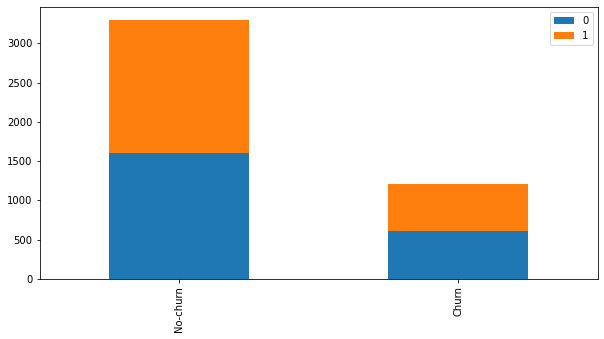

In [19]:
bar_chart('gender')

In [20]:
#gender droppabile
gender = train.groupby(by = 'gender')['MonthlyCharges'].mean().round()
gender

gender
0    65.0
1    65.0
Name: MonthlyCharges, dtype: float64

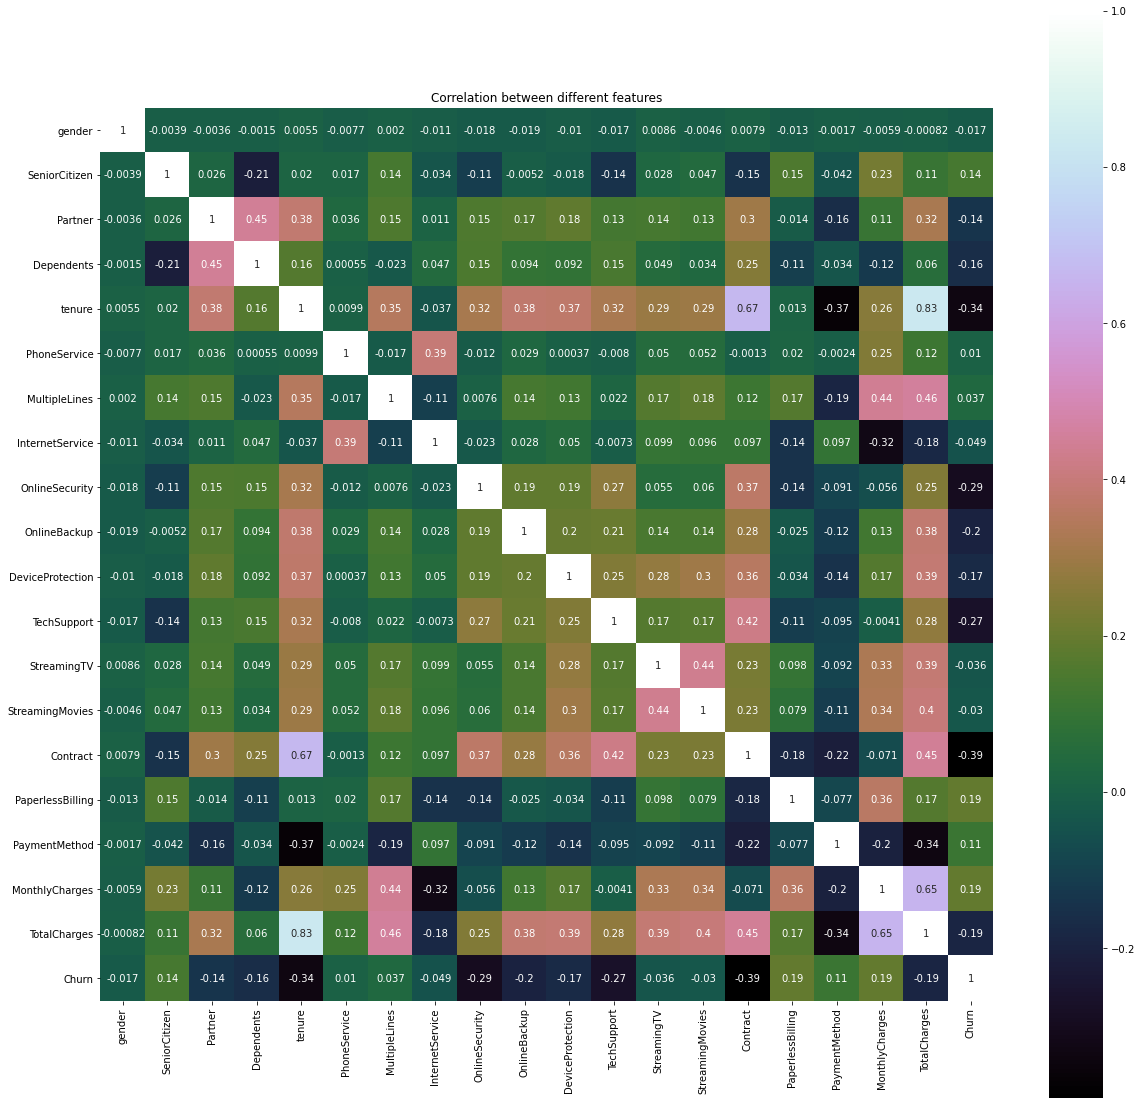

In [21]:
heat_map()

In [22]:
train = drop_columns(train)

test = convert_columns(test)
test = encode(test)
test = drop_columns(test)

In [23]:
y_train = train["Churn"].copy()
X_train = train.drop("Churn",axis=1).copy()

y_test = test["Churn"].copy()
X_test = test.drop("Churn",axis=1).copy()

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
trainedtree = model.fit(X_train, y_train)

pred = model.predict(X_test)

print(accuracy_score(y_test, pred)*100)
print(model.score(X_test, y_test))

77.7284826974268
0.7772848269742679
